<a href="https://colab.research.google.com/github/abelva002/telco-customer-churn-with-hyperparameter-tuning/blob/main/Customer_Churn_Prediction_with_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the data

data = pd.read_csv('/content/drive/MyDrive/Tugas dibimbing/Day 28 _ Hyperparameter TUning/Homework/churn.csv')

In [ ]:
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking for Missing Values

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


In [ ]:
# Counting number of Missing Value for each column

data.isna().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
# Value Distribution in each column

for col in data:
  print(f"Value Counts of {col} column")
  print(data[col].value_counts(), '\n')

Value Counts of customerID column
6000-UKLWI    2
3604-WLABM    2
2342-CKIAO    2
5067-WJEUN    2
5233-GEEAX    2
             ..
0020-INWCK    1
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
3186-AJIEK    1
Name: customerID, Length: 7023, dtype: int64 

Value Counts of Gender column
Male      3552
Female    3478
Name: Gender, dtype: int64 

Value Counts of SeniorCitizen column
0.0    5892
1.0    1142
Name: SeniorCitizen, dtype: int64 

Value Counts of Partner column
No     3638
Yes    3392
Name: Partner, dtype: int64 

Value Counts of Dependents column
No     4931
Yes    2096
Name: Dependents, dtype: int64 

Value Counts of Tenure column
1.0     613
72.0    361
2.0     238
3.0     200
4.0     176
       ... 
38.0     60
28.0     57
39.0     56
44.0     51
36.0     49
Name: Tenure, Length: 72, dtype: int64 

Value Counts of Contract column
Month-to-month    3873
Two year          1689
One year          1471
Name: Contract, dtype: int64 

Value Counts of PaperlessBilling column
Yes   

In [ ]:
# Missing Value Handling
# Imputation with Median will be applied to Numerical Column
# Imputation with Mode will be applied to Categorical Column

Cats_Cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Nums_Cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Categorical
for col in Cats_Cols:
  data[col] = data[col].fillna(data[col].mode()[0])

# Numerical
for col in Nums_Cols:
  data[col] = data[col].fillna(data[col].median(0))

In [ ]:
# Rechecking Missing Values

data.isna().sum()

# Note: customerID will not be used as a predictor during the modelling process

customerID          9
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Checking for Duplicated Rows

data.duplicated().sum()

14

In [ ]:
# Sampling Duplicated Rows

data[data.duplicated(keep = False)].head(7)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
858,4795-UXVCJ,Male,0.0,No,No,26.0,One year,No,Credit card (automatic),19.80,457.30,No
2350,5067-WJEUN,Male,0.0,Yes,Yes,67.0,Two year,Yes,Bank transfer (automatic),54.20,3838.20,No
3314,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
3393,8434-PNQZX,Female,0.0,No,No,42.0,Two year,Yes,Credit card (automatic),78.45,3373.40,No
3478,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
3652,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No
3843,6418-HNFED,Male,0.0,Yes,No,51.0,Two year,Yes,Credit card (automatic),83.25,4089.45,No


In [ ]:
# Drop Duplicated Rows

data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
# Transforming Categorical Data (Binary Category)

data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data['Partner'] = data['Partner'].apply(lambda x: 1 if x=='Yes' else 0)
data['Dependents'] = data['Dependents'].apply(lambda x: 1 if x=='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].apply(lambda x: 1 if x=='Yes' else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Transforming Categorical Data (One Hot Encoding)

OneHot_Cols = ['Contract', 'PaymentMethod']

for col in OneHot_Cols:
  data1 = pd.get_dummies(data[[col]])
  data2 = data.drop(columns = col)

  data = pd.concat([data1, data2], axis = 1)

In [ ]:
# Transformation Result

data

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,7590-VHVEG,0,0.0,0,0,1.0,1,29.85,29.85,0
1,0,0,0,1,0,1,0,5575-GNVDE,1,0.0,0,0,34.0,0,56.95,1889.50,0
2,0,0,0,1,1,0,0,3668-QPYBK,1,0.0,0,0,2.0,1,53.85,108.15,1
3,1,0,0,0,0,1,0,7795-CFOCW,1,0.0,0,0,45.0,0,42.30,1840.75,0
4,0,0,1,0,1,0,0,9237-HQITU,0,0.0,0,0,2.0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,6840-RESVB,1,0.0,1,1,24.0,1,84.80,1990.50,0
7028,0,1,0,0,0,1,0,2234-XADUH,0,0.0,1,1,72.0,1,103.20,7362.90,0
7029,0,0,1,0,1,0,0,4801-JZAZL,0,0.0,1,1,11.0,1,29.60,346.45,0
7030,0,0,0,1,1,0,0,8361-LTMKD,1,1.0,1,0,4.0,1,74.40,306.60,1


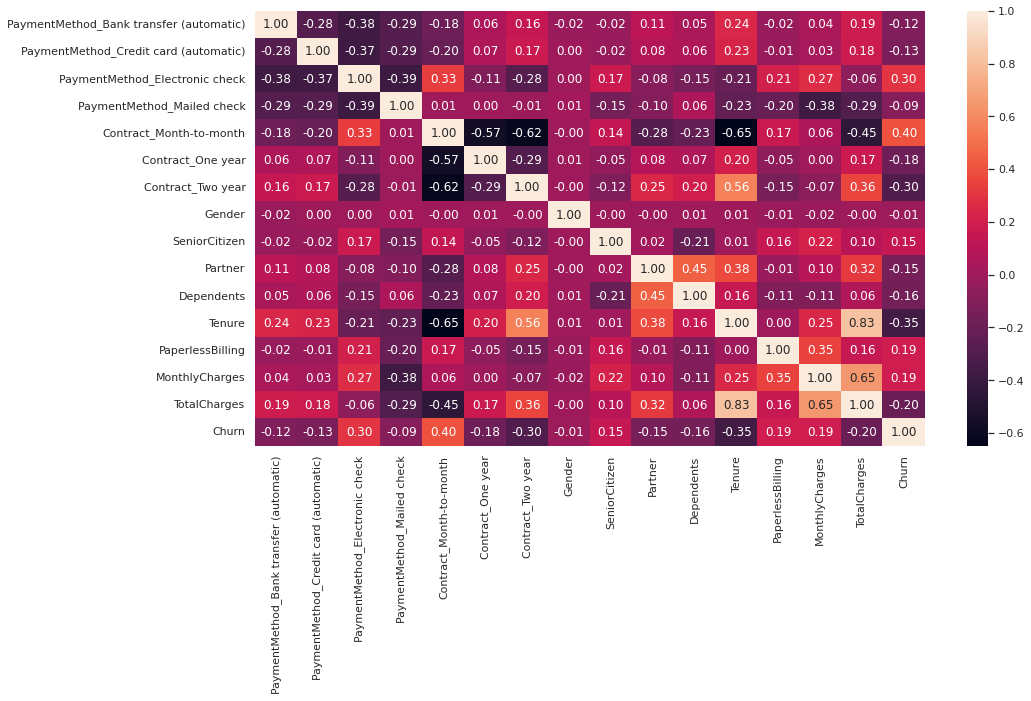

In [ ]:
# Checking for Multicollinearity

correlation = data.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation, annot = True, fmt = '.2f')

In [ ]:
# From the correlation graph above, observations with absolute correlation > 80:
# - Tenure and TotalCharges has absolute correlation of 0.83

# By comparing the absolute correlation of Tenure - Churn (0.35) with the absolute correlation of TotalCharges - Churn (0.20) it is concluded that:
# Tenure will be retained because it's more correlated to Churn, while TotalCharges will be dropped

data = data.drop(columns = 'TotalCharges')

In [ ]:
data

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,7590-VHVEG,0,0.0,0,0,1.0,1,29.85,0
1,0,0,0,1,0,1,0,5575-GNVDE,1,0.0,0,0,34.0,0,56.95,0
2,0,0,0,1,1,0,0,3668-QPYBK,1,0.0,0,0,2.0,1,53.85,1
3,1,0,0,0,0,1,0,7795-CFOCW,1,0.0,0,0,45.0,0,42.30,0
4,0,0,1,0,1,0,0,9237-HQITU,0,0.0,0,0,2.0,1,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,6840-RESVB,1,0.0,1,1,24.0,1,84.80,0
7028,0,1,0,0,0,1,0,2234-XADUH,0,0.0,1,1,72.0,1,103.20,0
7029,0,0,1,0,1,0,0,4801-JZAZL,0,0.0,1,1,11.0,1,29.60,0
7030,0,0,0,1,1,0,0,8361-LTMKD,1,1.0,1,0,4.0,1,74.40,1


In [ ]:
# Split the data into Train and Test Data

from sklearn.model_selection import train_test_split

X = data.drop(columns = ['customerID', 'Churn']).to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print('Churn class distribution: ')
print(data['Churn'].value_counts())

# Due to the imbalanced nature of the data, Recall will be used as the evaluation metrics instead of Accuracy.
# Furhermore, to predict Customer Churn status it is better to minimize False Negative compared to False Positive which supports the argument that Recall should be used.


Churn class distribution: 
0    5163
1    1869
Name: Churn, dtype: int64


In [ ]:
# Define Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1)

In [ ]:
# Training the model plus Hyperparameters Tuning

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth': (1,2,3,4,5)
}

rf_gridCV = GridSearchCV(rf_model, parameters, cv = 5, scoring = 'recall')
rf_gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# Training results

cv_result = pd.DataFrame(rf_gridCV.cv_results_)
final_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result[final_cols].sort_values('rank_test_score')


,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.425823,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.420503,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.407874,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.407207,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.407203,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.357307,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.347329,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.346009,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.344011,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.332049,10


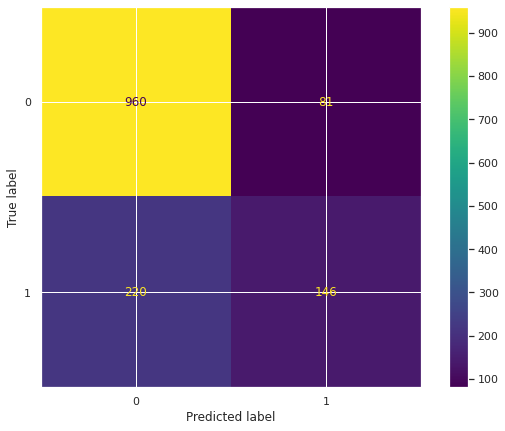

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_gridCV.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = rf_gridCV.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf_gridCV.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Classification Report

from sklearn.metrics import classification_report
y_pred = rf_gridCV.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1041
           1       0.64      0.40      0.49       366

    accuracy                           0.79      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
# The result obtained is Recall of 0.40 and F1 Score of 0.49. The result is only fairly fine due to the imbalanced nature of the dataset, which contains more 0 (No) class
# compared to the 1 (Yes) class. This results in more False Negative compared to False Positive, because the data is more "used to" towards predicting 0 class.
# Furthermore, the Recall and F1 Score are fairly lower comapred to Precision (0.64) and Accuracy (0.79)
